<a href="https://colab.research.google.com/github/ValenMR/ia_forest_cover_prediction_project/blob/main/03_Modelos__e_iteraciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrega Final
## Eliana Janneth Puerta Morales
## Juan Fernando Lopera Muñoz
## Valentina Muñoz Rincón



## Librerías usadas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import json
import zipfile
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [ ]:
!pip install kaggle

## Configuración de archivos de Kaggle

In [ ]:
data = {"username":"juanloperamuoz","key":"0f64b8bbc3b0a82887b4db2c623a941f"}
with open('kaggle.json', 'w') as file:
    json.dump(data, file, indent=4)

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c forest-cover-type-prediction

forest-cover-type-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
with zipfile.ZipFile('forest-cover-type-prediction.zip', 'r') as zip_ref:
    zip_ref.extractall('forest-cover-type-prediction')

Lectura del archivo

In [ ]:
df = pd.read_csv("/content/forest-cover-type-prediction/train.csv")
df.head(100)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2860,31,10,295,98,3644,218,218,135,...,0,0,0,0,0,0,0,0,0,1
96,97,3067,164,11,85,7,6811,230,243,144,...,0,0,0,0,0,0,0,0,0,2
97,98,2804,72,5,543,61,3115,225,231,141,...,0,0,0,0,0,0,0,0,0,2
98,99,2562,59,3,0,0,1116,221,233,148,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
df_used = df.copy()

## Simulación de datos para cumplir con el requisito de tener un 5% de datos faltantes en al menos 3 columnas

In [ ]:
columns_to_simulate = ["Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Fire_Points"]
random_num = -1

for col in columns_to_simulate:
  for k in range(0,900):
    random_num = np.random.randint(0,high=15120)
    df_used.loc[random_num,col] = np.nan



Descripción de mediciones númericas por columna

In [ ]:
df_description = df_used.describe()
df_description

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,13433.000000,13423.000000,13432.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.597782,51.254414,1707.317674,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.470257,61.406458,1321.795353,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,755.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1315.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,80.000000,2259.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1318.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


### Columnas simuladas y la cantidad de NaN generados

In [ ]:
list_na = df_used.columns[df_used.isna().any()].tolist()
for column in list_na:
  print(f"{column} : {df_used[column].isna().sum()}")

Horizontal_Distance_To_Hydrology : 1687
Vertical_Distance_To_Hydrology : 1697
Horizontal_Distance_To_Roadways : 1688
Horizontal_Distance_To_Fire_Points : 1708


## Preprocesamiento de datos

Eliminación de datos con valores NaN

In [ ]:
df_without_null = df_used.dropna()
df_without_null.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


Calculamos las medias de las columnas simuladas sin sus valores nulos

In [ ]:
means_list = np.mean(df_without_null[columns_to_simulate], axis=0)

Se completan los valores nulos con la media de su columna sin los valores nulos

In [ ]:
for column in columns_to_simulate:
  df_used[column].fillna(means_list[column], inplace=True)

In [ ]:
df_used.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Id                                  15120 non-null  int64  
 1   Elevation                           15120 non-null  int64  
 2   Aspect                              15120 non-null  int64  
 3   Slope                               15120 non-null  int64  
 4   Horizontal_Distance_To_Hydrology    15120 non-null  float64
 5   Vertical_Distance_To_Hydrology      15120 non-null  float64
 6   Horizontal_Distance_To_Roadways     15120 non-null  float64
 7   Hillshade_9am                       15120 non-null  int64  
 8   Hillshade_Noon                      15120 non-null  int64  
 9   Hillshade_3pm                       15120 non-null  int64  
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  float64
 11  Wilderness_Area1                    15120

In [ ]:
df_description = df_used.describe()
df_description

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.712277,51.265358,1706.549741,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,198.381019,57.857704,1245.826367,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,85.000000,7.000000,828.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,212.000000,42.000000,1463.500000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,301.000000,72.000000,2110.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1318.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


Correlación de cada una de las columnas con el tipo de cobertura.

In [ ]:
abs(df_used.corr()['Cover_Type']).sort_values(ascending=True)

Soil_Type30                           0.001393
Soil_Type34                           0.003470
Soil_Type18                           0.006312
Soil_Type6                            0.006521
Aspect                                0.008015
Soil_Type8                            0.008133
Soil_Type25                           0.008133
Soil_Type16                           0.008793
Soil_Type11                           0.010228
Hillshade_9am                         0.010286
Horizontal_Distance_To_Hydrology      0.011334
Soil_Type28                           0.012202
Wilderness_Area2                      0.014994
Soil_Type1                            0.015069
Elevation                             0.016090
Soil_Type3                            0.016393
Soil_Type26                           0.017184
Soil_Type14                           0.022019
Soil_Type2                            0.022627
Soil_Type27                           0.023109
Soil_Type21                           0.024410
Soil_Type36  

Normalización de los datos

In [ ]:
scaler = MinMaxScaler()
columns_continuous_variables = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
df_used[columns_continuous_variables] = scaler.fit_transform(df_used[columns_continuous_variables])
df_used.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,0.446285,0.435213,0.317338,0.172771,0.281808,0.247685,0.837418,0.773972,0.544726,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,0.210311,0.305794,0.162576,0.150517,0.082654,0.180817,0.120320,0.147109,0.185061,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,0.258308,0.180556,0.192308,0.064492,0.218571,0.120174,0.771654,0.696774,0.427419,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,0.447633,0.350000,0.288462,0.160850,0.268571,0.212409,0.866142,0.800000,0.556452,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,0.624874,0.725000,0.423077,0.228376,0.311429,0.306241,0.925197,0.877419,0.673387,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


Gráficas

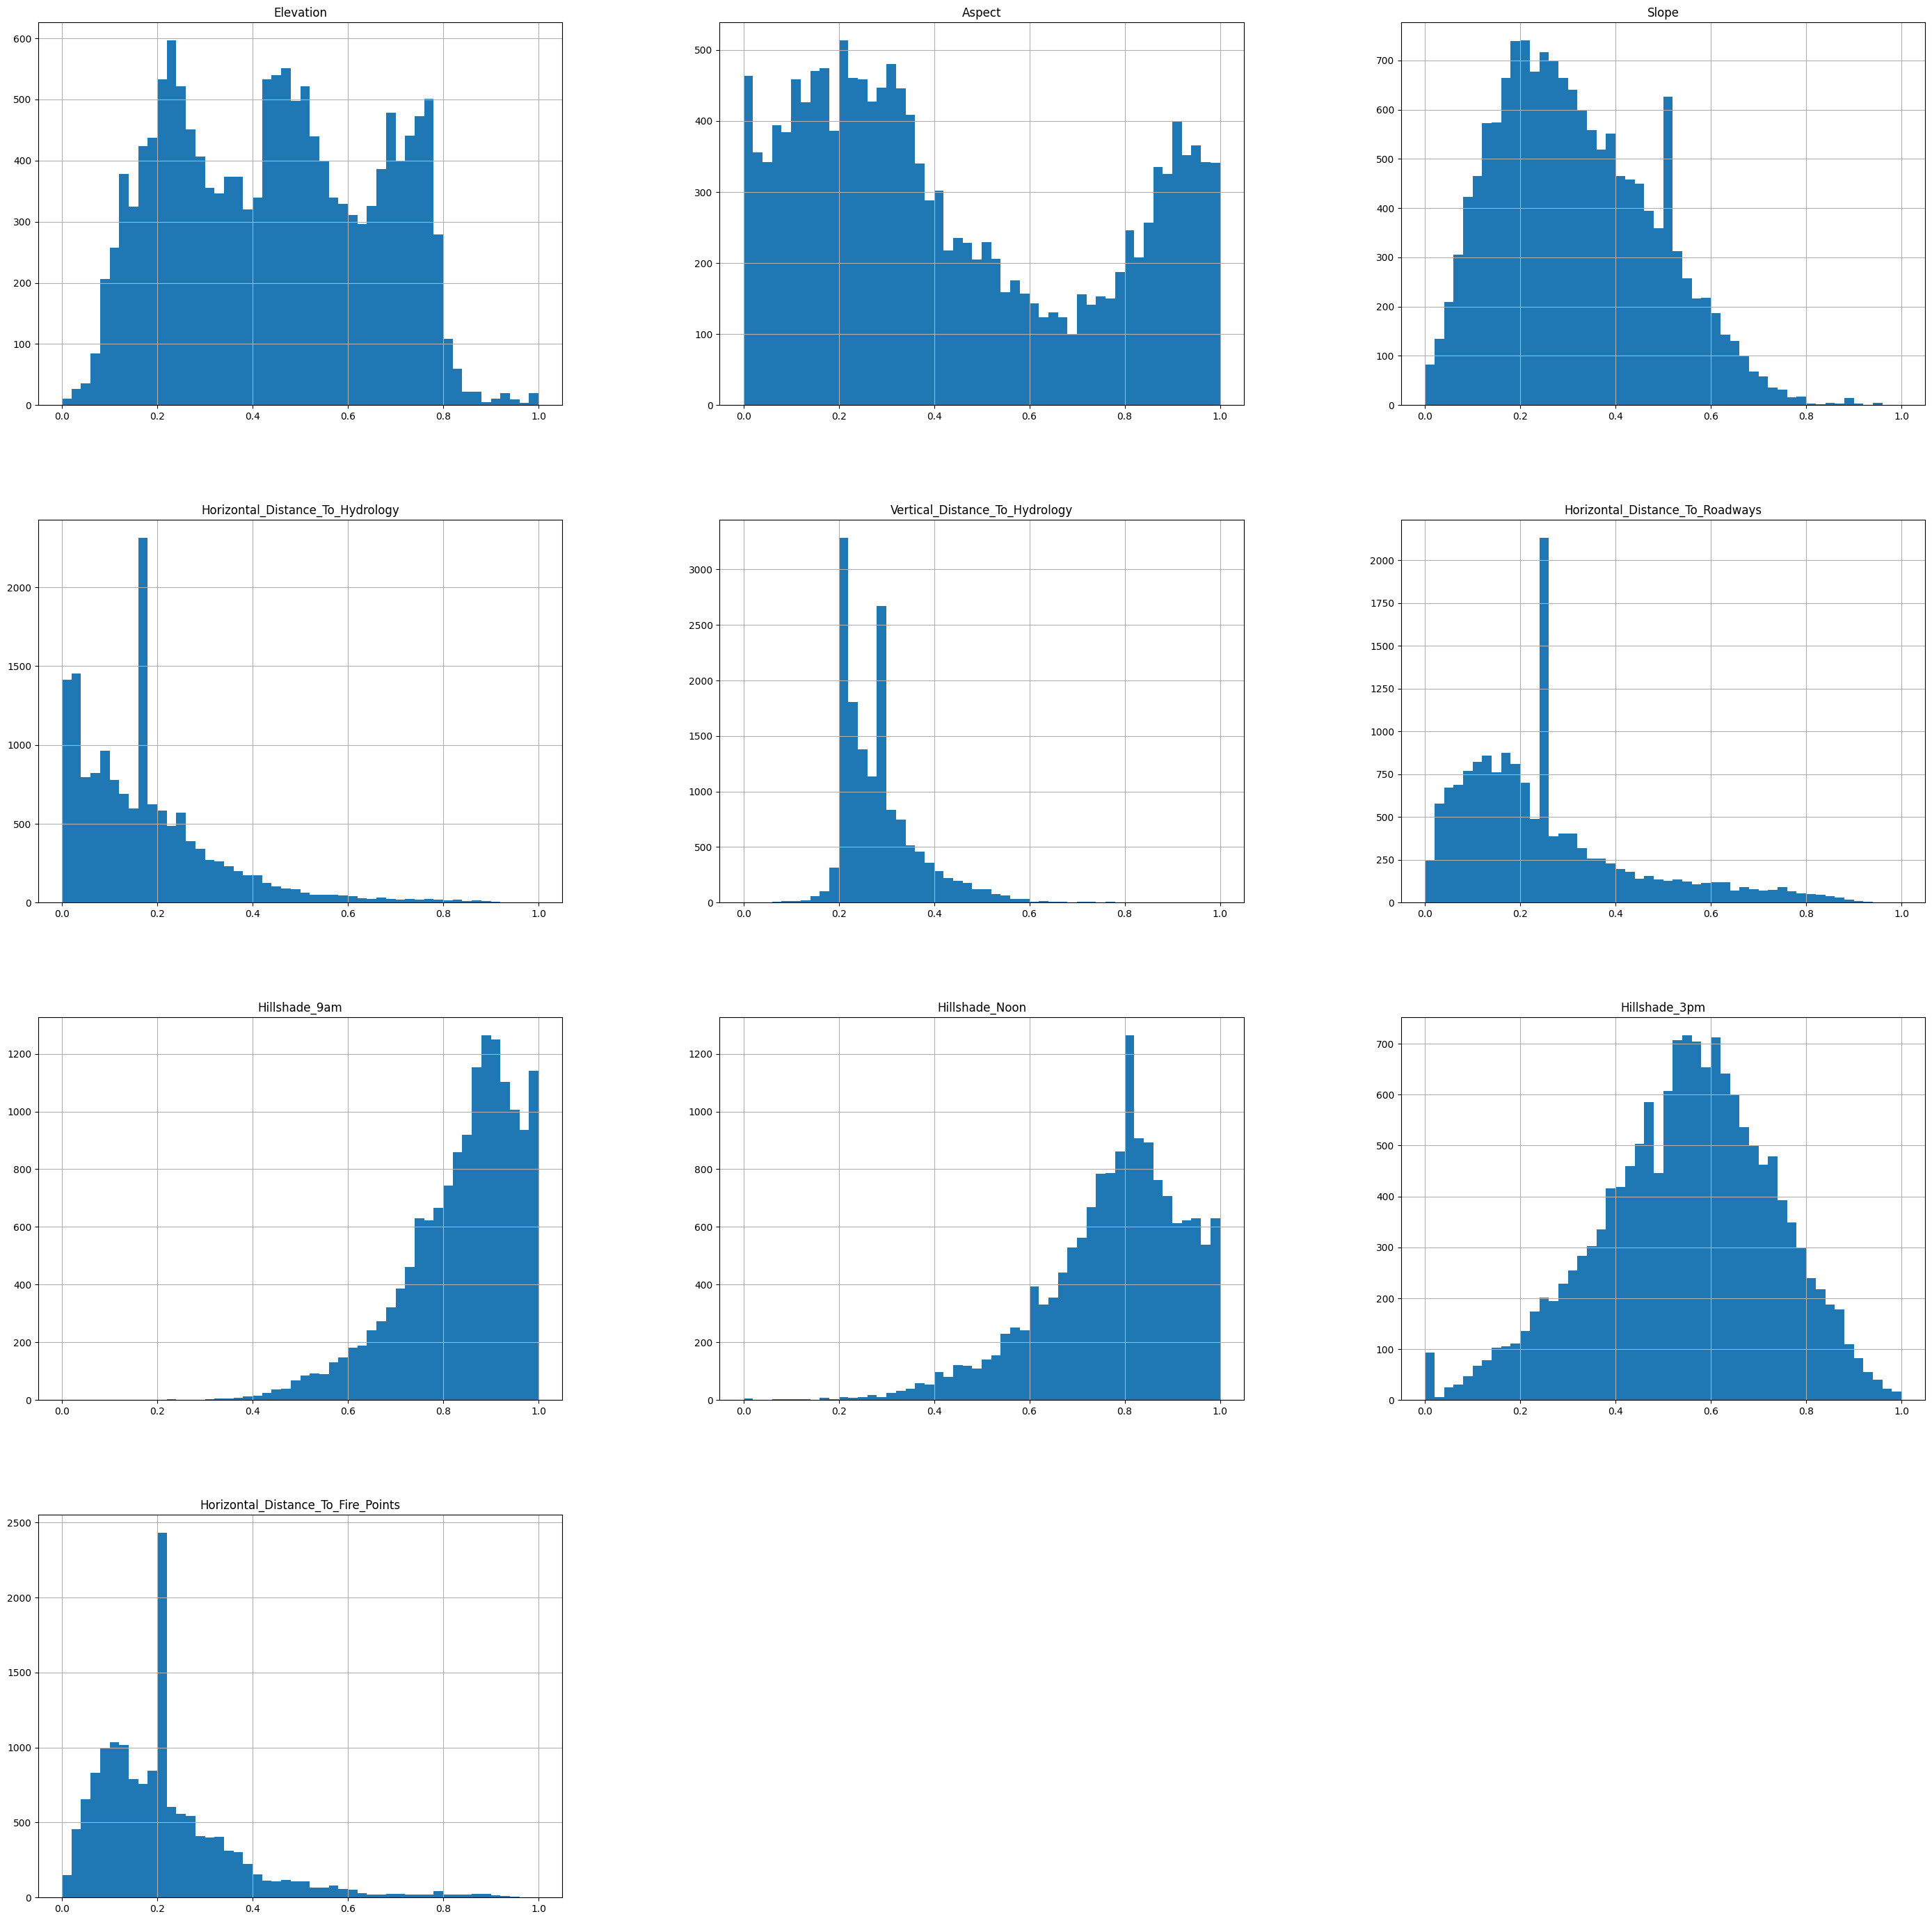

In [ ]:
df_used[columns_continuous_variables].hist(figsize = (35,35), bins = 50)
plt.show()

## Modelos e iteraciones

In [ ]:
x=df_used.drop(["Id","Cover_Type"],axis=1)
y=df_used['Cover_Type']

### Decision Tree

In [ ]:
def better_decision_tree(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
    train_accuracy = []
    test_accuracy = []
    depth_range = range(2, 30)
    for d in depth_range:
      np.random.seed(1)
      temp_random_forest = DecisionTreeClassifier(max_depth = d)
      temp_random_forest.fit(x_train, y_train)
      train_accuracy.append(temp_random_forest.score(x_train, y_train))
      test_accuracy.append(temp_random_forest.score(x_test, y_test))
    decisison_tree_index = np.argmax(test_accuracy)
    decision_tree_depth = depth_range[decisison_tree_index]
    model=DecisionTreeClassifier(max_depth=decision_tree_depth).fit(x_train,y_train)
    predict=DecisionTreeClassifier(max_depth=decision_tree_depth).fit(x_train,y_train).predict(x_test)
    accuracy = accuracy_score(y_test,predict)
    return accuracy, model

decision_tree_accuracy, decision_tree_model = better_decision_tree(x,y)
decision_tree_accuracy, decision_tree_model

(0.7705026455026455, DecisionTreeClassifier(max_depth=16))

### Random Forest

In [ ]:
def better_random_forest(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
    train_accuracy = []
    test_accuracy = []
    depth_range = range(2, 30)
    for d in depth_range:
      np.random.seed(1)
      temp_forest = RandomForestClassifier(n_estimators = 100, max_depth = d)
      temp_forest.fit(x_train, y_train)
      train_accuracy.append(temp_forest.score(x_train, y_train))
      test_accuracy.append(temp_forest.score(x_test, y_test))
    random_forest_index = np.argmax(test_accuracy)
    random_forest_depth = depth_range[random_forest_index]
    model=RandomForestClassifier(n_estimators = 100, max_depth = random_forest_depth).fit(x_train,y_train)
    predict=RandomForestClassifier(n_estimators = 100, max_depth = random_forest_depth).fit(x_train,y_train).predict(x_test)
    accuracy = accuracy_score(y_test,predict)

    return accuracy, model
random_forest_accuracy, random_forest_model = better_random_forest(x,y)
random_forest_accuracy, random_forest_model

(0.8449735449735449, RandomForestClassifier(max_depth=27))

### KMeans

In [ ]:
def better_kmeans(x,y):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
  kmeans = KMeans()
  param_grid = {'n_clusters': [2,3,4,5,6,7,8,9],
                'init':['k-means++', 'random'],
                'n_init':[10]
                ,
                'max_iter':[100,200,300]}
  grid_search=GridSearchCV(estimator=kmeans, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=5).fit(x_train,y_train)
  best_model = grid_search.best_estimator_
  predictions = best_model.predict(x_test)
  accuracy = accuracy_score(y_test, predictions)
  return accuracy,best_model
kmeans_accuracy, kmeans_model = better_kmeans(x,y)
kmeans_accuracy, kmeans_model

(0.1984126984126984, KMeans(max_iter=100, n_clusters=5, n_init=10))

### Otros

In [ ]:
def better_PCA(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    num_components_list = [2, 4, 6, 8, 10, 12, 14]
    accuracy_scores = []

    for num_components in num_components_list:
        # Aplicar PCA
        pca = PCA(n_components=num_components, random_state=42)
        X_train_pca = pca.fit_transform(x_train)

        # Aplicar KMeans
        kmeans = KMeans(n_clusters=len(np.unique(y)), n_init=10, random_state=42)
        labels = kmeans.fit_predict(X_train_pca)

        # Calcular accuracy utilizando validación cruzada
        accuracy = np.mean(cross_val_score(kmeans, X_train_pca, y_train, cv=5, scoring='accuracy'))
        accuracy_scores.append(accuracy)

    return accuracy_scores
better_PCA(x,y)

[0.10515423694648769,
 0.14624761273526726,
 0.11152508208090905,
 0.18865684542823855,
 0.11672872131438783,
 0.15228572697549364,
 0.15600613599636487]

## Curva de aprendizaje

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### Curva aprendizaje Decision Tree

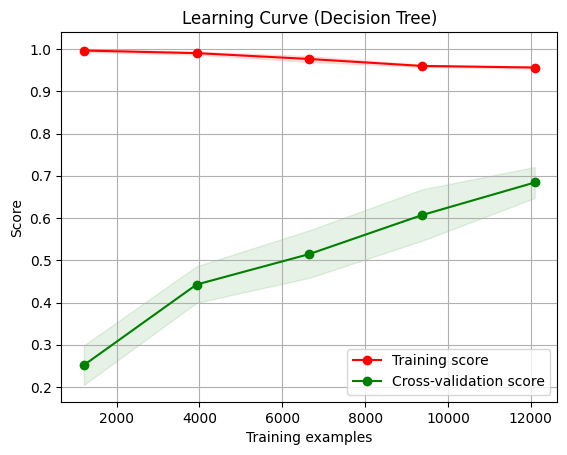

In [ ]:
plot_learning_curve(decision_tree_model, "Learning Curve (Decision Tree)", x, y, cv=5, n_jobs=2)
plt.show()

### Curva aprendizaje Random Forest

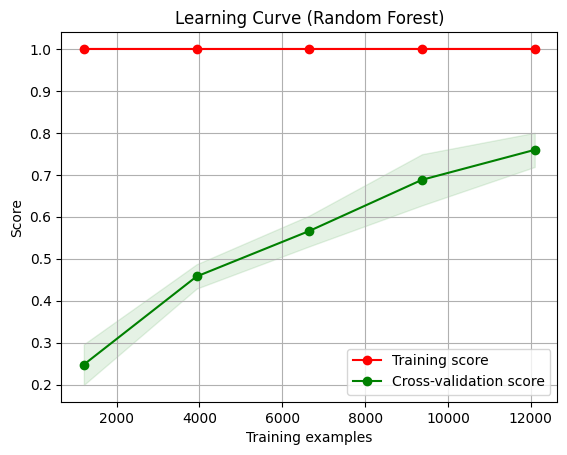

In [ ]:
plot_learning_curve(random_forest_model, "Learning Curve (Random Forest)", x, y, cv=5, n_jobs=2)
plt.show()

### Curva aprendizaje KMeans

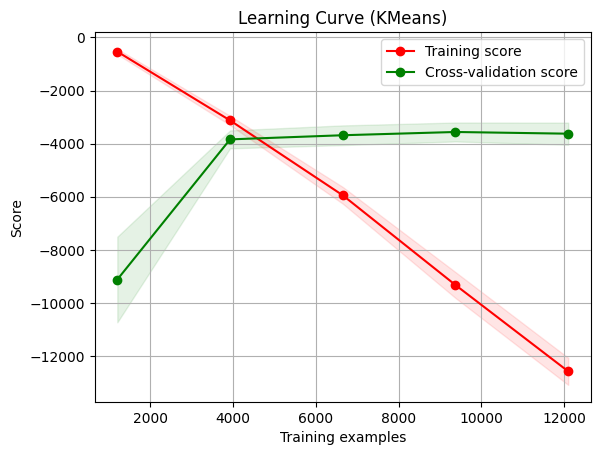

In [ ]:
plot_learning_curve(kmeans_model, "Learning Curve (KMeans)", x, y, cv=5, n_jobs=2)
plt.show()

## Predicción del test.csv

Se pudo observar que el método más preciso fue Random Forest con una profundidad de 27 y 100 estimadores.



In [ ]:
df_test = pd.read_csv("/content/forest-cover-type-prediction/test.csv")
df_test.head(10)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0
5,15126,2699,21,18,30,3,2890,206,200,127,...,0,0,0,0,0,0,0,0,0,0
6,15127,2699,15,17,30,6,2860,202,202,133,...,0,0,0,0,0,0,0,0,0,0
7,15128,2696,10,16,30,6,2830,202,207,140,...,0,0,0,0,0,0,0,0,0,0
8,15129,2696,17,13,30,6,2770,208,211,138,...,0,0,0,0,0,0,0,0,0,0
9,15130,2693,14,15,30,7,2741,205,209,138,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y ,random_state=42)
model = RandomForestClassifier(n_estimators=100, max_depth=27)
model.fit(x_train,y_train)
print(model.score(x_test,y_test)*100)
predict=model.predict(df_test.drop(labels=['Id'],axis=1))
submission= pd.DataFrame(data = predict ,columns = ['Cover_Type'])
submission.head(100)

84.04761904761905


,Cover_Type
0,1
1,1
2,1
3,1
4,1
...,...
95,1
96,2
97,2
98,2
